MNIST dataset downloaded from kaggle

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

Print the head of dataset

In [2]:
data_set = pd.read_csv('train.csv')
print(data_set.head())


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
label = data_set['label']


In [4]:
new_data_set = data_set.drop("label", axis = 1) 


In [5]:
print(label.shape)
print(new_data_set.shape)

(42000,)
(42000, 784)


Ploting a random number

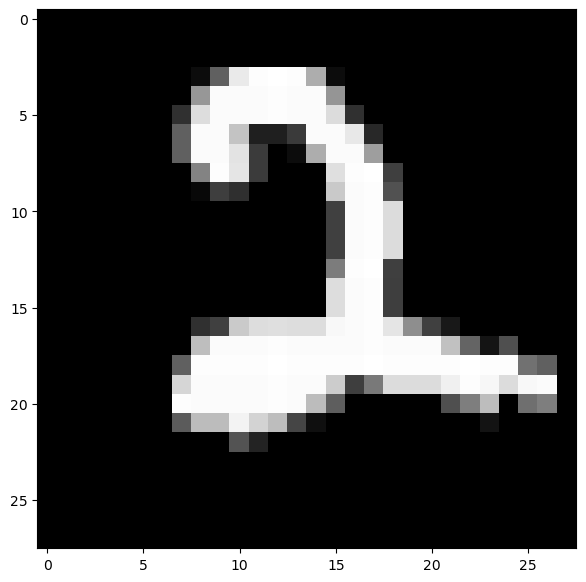

2


In [6]:
plt.figure(figsize=(7,7))
idx = 3656

grid_data = new_data_set.iloc[idx].values.reshape(28,28)  
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(label[idx])

In [7]:
l =data_set['label']
d = data_set.drop("label", axis=1) 

In [8]:
labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data is = ", data.shape)

the shape of sample data is =  (15000, 784)


Pre-Processing: Standarding the data

In [9]:
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [10]:
sample_data = standardized_data

covar_matrix = np.matmul(sample_data.T , sample_data)

print( "The shape of the covariance matrix = ", covar_matrix.shape)

The shape of the covariance matrix =  (784, 784)


for projecting into a 2-dim space.

In [11]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print( "Shape of eigen vectors = ", vectors.shape)
vectors = vectors.T
print("updated shape of eigen vectors = ", vectors.shape)

Shape of eigen vectors =  (784, 2)
updated shape of eigen vectors =  (2, 784)


In [12]:
new_coordinates = np.matmul(vectors, sample_data.T)
print ("resultatnt new data points shape ", vectors.shape, "X", sample_data.T.shape , "=", new_coordinates.shape )

resultatnt new data points shape  (2, 784) X (784, 15000) = (2, 15000)


In [13]:
new_coordinates = np.vstack((new_coordinates, labels)).T

dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))

print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


plotting the 2d data points with seaborn

C:\Users\Raj\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


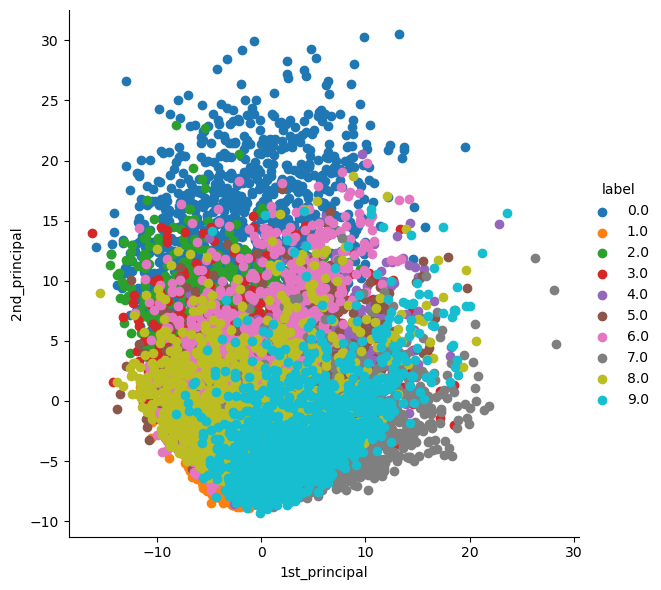

In [14]:
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal','2nd_principal').add_legend()
plt.show()

Initializing the pca

In [15]:
from sklearn import decomposition
pca = decomposition.PCA()

In [16]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print("New shape of pca_reduced.shape = ", pca_data.shape)

New shape of pca_reduced.shape =  (15000, 2)


C:\Users\Raj\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


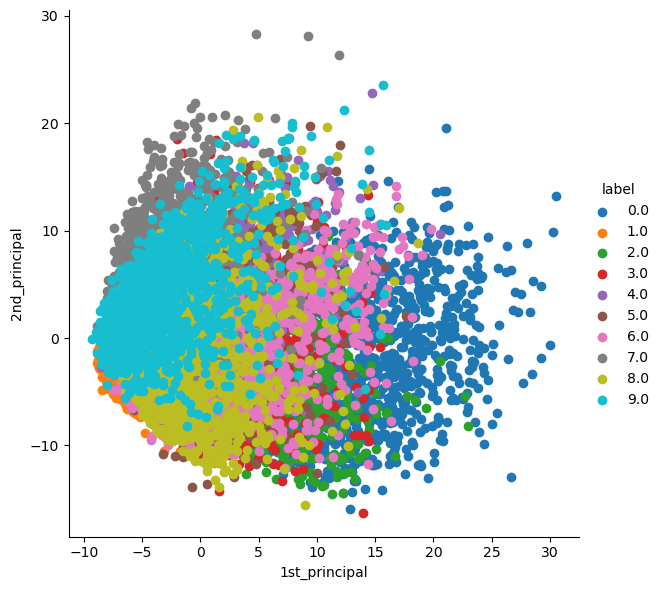

In [17]:
pca_data = np.vstack((pca_data.T, labels)).T

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

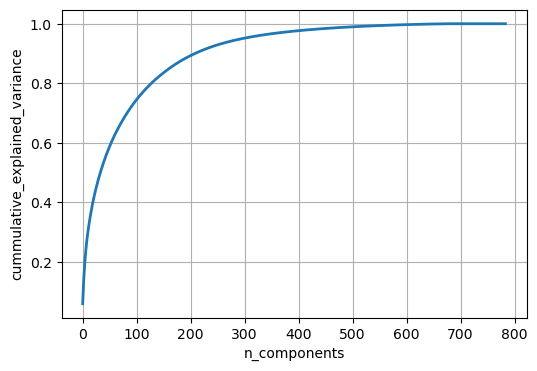

In [18]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_ )

cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cummulative_explained_variance')
plt.show()

TSNE

C:\Users\Raj\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


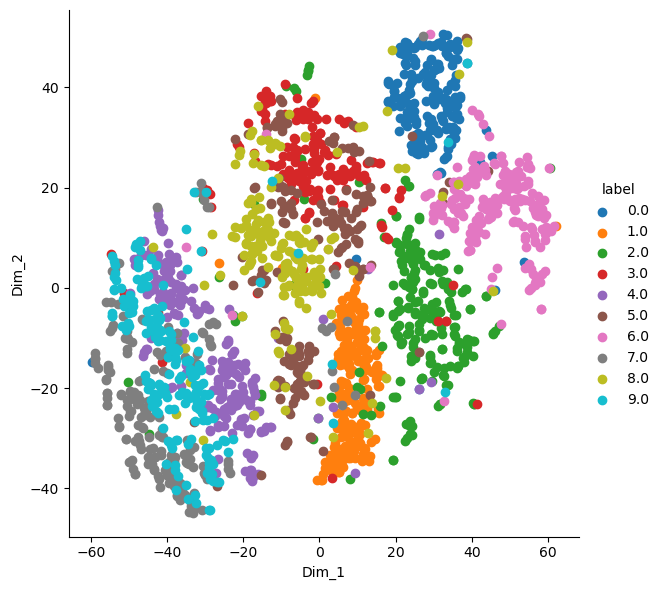

In [19]:
from sklearn.manifold import TSNE

data_2000 = standardized_data[0:2000,:]
labels_2000 = labels[0:2000]

model = TSNE(n_components =2, random_state= 0)

tsne_data = model.fit_transform(data_2000)

tsne_data = np.vstack((tsne_data.T,labels_2000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Raj\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


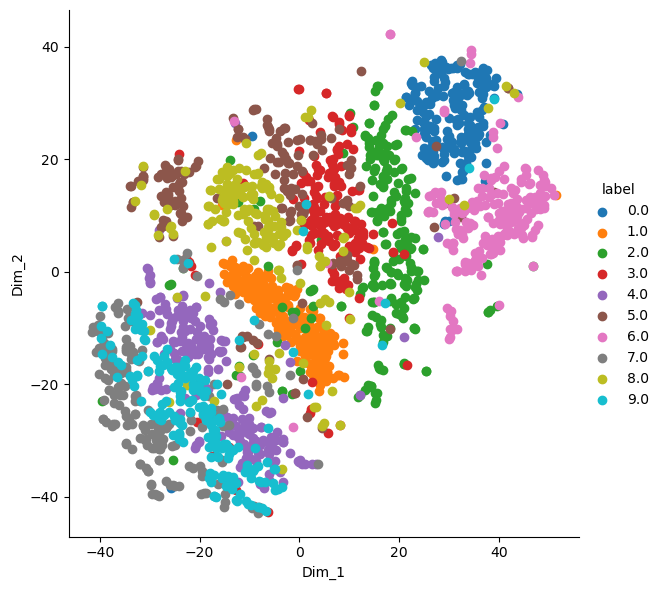

In [20]:
model = TSNE(n_components =2, random_state= 0, perplexity=50)
tsne_data = model.fit_transform(data_2000)

tsne_data = np.vstack((tsne_data.T,labels_2000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()